In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import read_osu_log, read_osu_log_multi, plot_osu
from collective_algo import (
    bcast_algo_intelmpi, bcast_algo_openmpi3, bcast_algo_openmpi4,
    allreduce_algo_intelmpi, allreduce_algo_openmpi3, allreduce_algo_openmpi4
)

In [3]:
ls osu_log/bcast/N8n288/run1/openmpi3

bcast_algo0.log    bcast_algo2.log    bcast_algo4.log    bcast_algo6.log
bcast_algo1.log    bcast_algo3.log    bcast_algo5.log    bcast_default.log


In [4]:
ls osu_log/allreduce/N8n288/run1/openmpi3

allreduce_algo0.log    allreduce_algo3.log    allreduce_default.log
allreduce_algo1.log    allreduce_algo4.log
allreduce_algo2.log    allreduce_algo5.log


# allreduce

In [5]:
def read_all_mpi_bcast(TOP_DIR='osu_log/bcast/N8n288/run3/'):
    
    ompi3_dir = TOP_DIR + 'openmpi3/'
    ompi3_file_list = [ompi3_dir + 'bcast_default.log'] + [ompi3_dir + 'bcast_algo{}.log'.format(i) for i in range(0, 7)]
    df_ompi3 = read_osu_log_multi(ompi3_file_list, ['default'] + allreduce_algo_openmpi3)
    
    ompi4_dir = TOP_DIR + 'openmpi4/'
    ompi4_file_list = [ompi4_dir + 'bcast_default.log'] + [ompi4_dir + 'bcast_algo{}.log'.format(i) for i in range(0, 10)]
    df_ompi4 = read_osu_log_multi(ompi4_file_list, ['default'] + bcast_algo_openmpi4)
    
    impi_dir = TOP_DIR + 'intelmpi-tcp/'
    impi_file_list = [impi_dir + 'bcast_default.log'] + [impi_dir + 'bcast_algo{}.log'.format(i) for i in range(1, 15)]
    df_impi = read_osu_log_multi(impi_file_list, ['default'] + bcast_algo_intelmpi)
    
    impi_efa_dir = TOP_DIR + 'intelmpi-efa/'
    impi_efa_file_list = [impi_efa_dir + 'bcast_default.log'] + [impi_efa_dir + 'bcast_algo{}.log'.format(i) for i in range(1, 15)]
    df_impi_efa = read_osu_log_multi(impi_efa_file_list, ['default'] + bcast_algo_intelmpi)
    
    mpich_dir = TOP_DIR + 'mpich3/'
    df_mpich = read_osu_log_multi([mpich_dir + 'bcast_default.log'], columns=['default'])
    
    df_all = pd.concat([
        df_impi_efa.add_suffix(' | IntelMPI-EFA'),
        df_impi.add_suffix(' | IntelMPI-TCP'),
        df_ompi3.add_suffix(' | OpenMPI 3'), 
        df_ompi4.add_suffix(' | OpenMPI 4'),
        df_mpich.add_suffix(' | MPICH 3'), 
    ], axis=1)
    
    return df_all

In [6]:
# single run
# df_bcast = read_all_mpi_bcast('osu_log/bcast/N8n288/run3/')

# average over all runs
df_bcast = sum(read_all_mpi_bcast(f'osu_log/bcast/N8n288/run{i}/') for i in range(1, 6)) / 5

df_bcast.shape

(21, 49)

In [7]:
df_bcast.tail()

,default | IntelMPI-EFA,1. Binomial | IntelMPI-EFA,2. Recursive doubling | IntelMPI-EFA,3. Ring | IntelMPI-EFA,4. Topology aware binomial | IntelMPI-EFA,5. Topology aware recursive doubling | IntelMPI-EFA,6. Topology aware ring | IntelMPI-EFA,7. Shumilin's | IntelMPI-EFA,8. Knomial | IntelMPI-EFA,9. Topology aware SHM-based flat | IntelMPI-EFA,...,1. basic linear | OpenMPI 4,2. chain | OpenMPI 4,3. pipeline | OpenMPI 4,4. split binary tree | OpenMPI 4,5. binary tree | OpenMPI 4,6. binomial tree | OpenMPI 4,7. knomial tree | OpenMPI 4,8. scatter_allgather | OpenMPI 4,9. scatter_allgather_ring | OpenMPI 4,default | MPICH 3
size,,,,,,,,,,,,,,,,,,,,,
65536,128.930,464.692,8777.982,8869.308,348.010,451.116,508.416,915.510,284.210,128.814,...,3429.350,680.792,2714.562,437.796,872.166,880.174,364.328,1163.136,1937.072,1132.992
131072,172.002,601.946,8963.314,9005.042,472.092,608.674,910.634,1247.726,411.750,171.340,...,4909.196,1018.948,3611.284,1074.030,1292.004,1391.150,495.508,1182.438,8452.330,1281.352
262144,345.384,1075.388,9127.006,9212.098,870.422,754.232,1060.708,1999.280,713.266,342.374,...,7647.386,2026.508,6058.520,1568.388,2343.962,2522.690,833.390,2089.296,8786.224,1939.742
524288,828.886,1982.450,9400.450,9494.930,1691.270,1097.782,1355.888,3444.592,1301.630,832.288,...,11697.054,2963.906,11562.520,2761.932,4043.540,4695.338,1290.342,3861.062,9111.682,3368.244
1048576,1678.242,3311.282,10025.652,10068.684,2643.168,1934.312,2014.336,6418.078,2526.698,1689.846,...,21729.342,6247.638,22927.274,4858.638,7696.274,9706.612,2537.350,7713.462,10184.438,3922.766


In [8]:
plt.rcParams['font.size'] = 14

def plot_all_algo(col, figsize=(8, 20)):
    # col = col[col < col['default | OpenMPI 3'] * 1.2]  # ignore cases that are too slower than default
    ax = col[::-1].plot.barh(figsize=figsize, color='C0', alpha=0.6, label='')

    ax.vlines(col['default | OpenMPI 3'], -0.5, col.size, linestyle='--',
              color='C1', linewidth=3.0, label='OpenMPI3 default')
    ax.vlines(col['default | IntelMPI-TCP'], -0.5, col.size, linestyle='--',
              color='C3', linewidth=3.0, label='IntelMPI-TCP default')
    ax.vlines(col['default | IntelMPI-EFA'], -0.5, col.size, linestyle='--',
              color='b', linewidth=3.0, label='IntelMPI-EFA default')
    
    ax.set_xlim(0, col['default | OpenMPI 3'] * 1.2)
    
    # annotate number https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(200.0, i.get_y()+0.1, str(int((i.get_width()))), fontsize=13, color='k')

    return ax
    

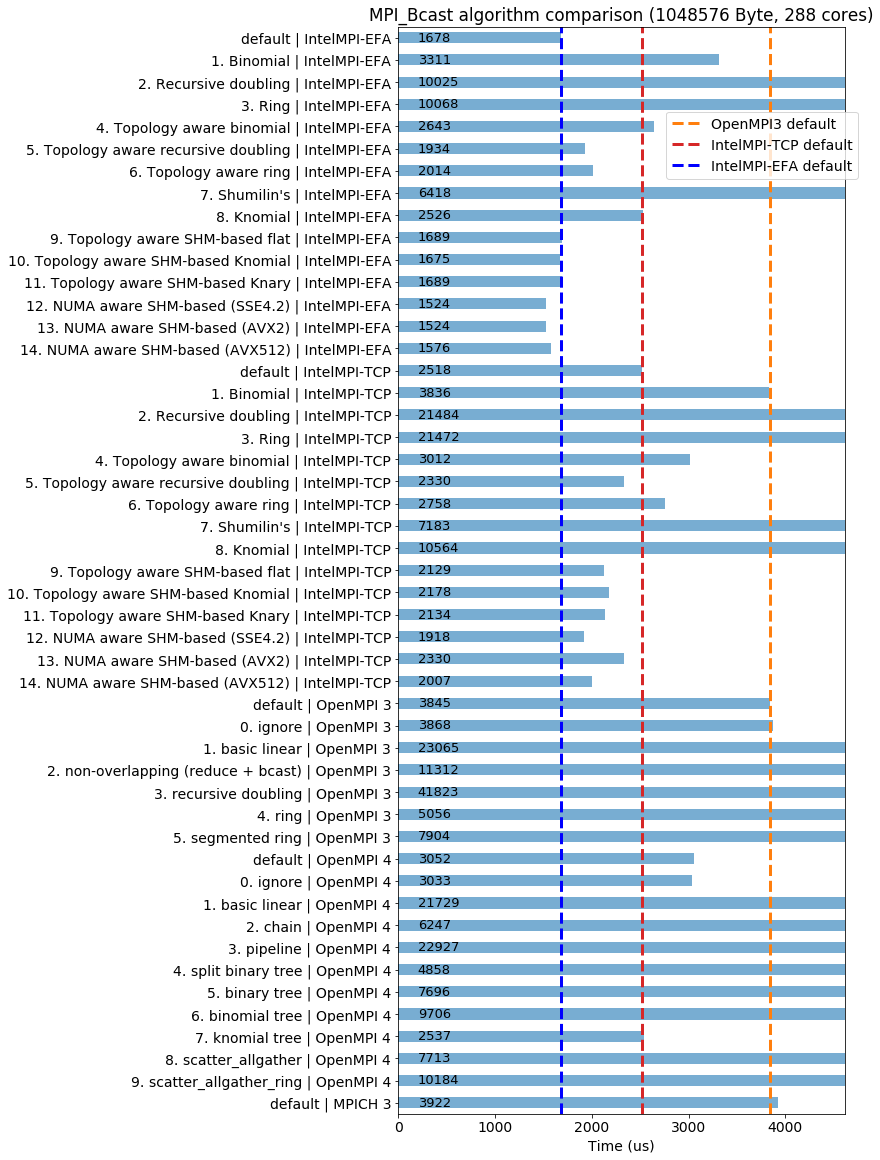

In [9]:
# message = 65536
message = 1048576

ax = plot_all_algo(df_bcast.loc[message])
ax.legend(loc=(0.6, 0.86))
ax.set_title(f'MPI_Bcast algorithm comparison ({message} Byte, 288 cores)')
ax.set_xlabel('Time (us)')
ax.figure.savefig(f'bcast_all_algo_{message}.png', dpi=300, bbox_inches='tight')

# Allreduce

In [10]:
def read_all_mpi_allreduce(TOP_DIR='osu_log/allreduce/N8n288/run3/'):
    
    ompi3_dir = TOP_DIR + 'openmpi3/'
    ompi3_file_list = [ompi3_dir + 'allreduce_default.log'] + [ompi3_dir + 'allreduce_algo{}.log'.format(i) for i in range(0, 6)]
    df_ompi3 = read_osu_log_multi(ompi3_file_list, ['default'] + allreduce_algo_openmpi3)
    
    ompi4_dir = TOP_DIR + 'openmpi4/'
    ompi4_file_list = [ompi4_dir + 'allreduce_default.log'] + [ompi4_dir + 'allreduce_algo{}.log'.format(i) for i in range(0, 6)]
    df_ompi4 = read_osu_log_multi(ompi4_file_list, ['default'] + allreduce_algo_openmpi4)
    
    impi_dir = TOP_DIR + 'intelmpi-tcp/'
    impi_file_list = [impi_dir + 'allreduce_default.log'] + [impi_dir + 'allreduce_algo{}.log'.format(i) for i in range(1, 13)]
    df_impi = read_osu_log_multi(impi_file_list, ['default'] + allreduce_algo_intelmpi)
    
    impi_efa_dir = TOP_DIR + 'intelmpi-efa/'
    impi_efa_file_list = [impi_efa_dir + 'allreduce_default.log'] + [impi_efa_dir + 'allreduce_algo{}.log'.format(i) for i in range(1, 13)]
    df_impi_efa = read_osu_log_multi(impi_efa_file_list, ['default'] + allreduce_algo_intelmpi)
    
    mpich_dir = TOP_DIR + 'mpich3/'
    df_mpich = read_osu_log_multi([mpich_dir + 'allreduce_default.log'], columns=['default'])
    
    df_all = pd.concat([
        df_impi_efa.add_suffix(' | IntelMPI-EFA'),
        df_impi.add_suffix(' | IntelMPI-TCP'),
        df_ompi3.add_suffix(' | OpenMPI 3'), 
        df_ompi4.add_suffix(' | OpenMPI 4'),
        df_mpich.add_suffix(' | MPICH 3'), 
    ], axis=1)
    
    return df_all

In [11]:
# single run
# df_allreduce = read_all_mpi_allreduce('osu_log/allreduce/N8n288/run3/')

# average over all runs
df_allreduce = sum(read_all_mpi_allreduce(f'osu_log/allreduce/N8n288/run{i}/') for i in range(1, 6)) / 5

df_allreduce.shape

(19, 41)

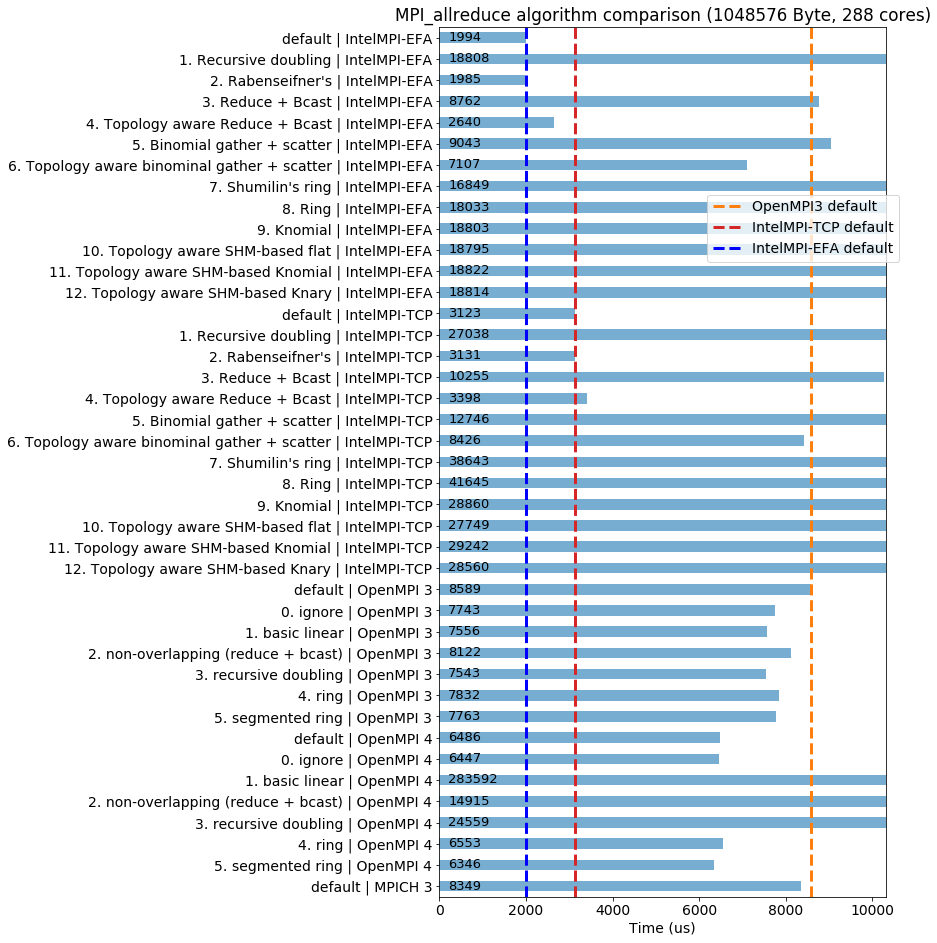

In [12]:
# message = 65536
message = 1048576

ax = plot_all_algo(df_allreduce.loc[message], figsize=[8, 16])
ax.legend(loc=(0.6, 0.73))
ax.set_title(f'MPI_allreduce algorithm comparison ({message} Byte, 288 cores)')
ax.set_xlabel('Time (us)')
ax.figure.savefig(f'allreduce_all_algo_{message}.png', dpi=300, bbox_inches='tight')

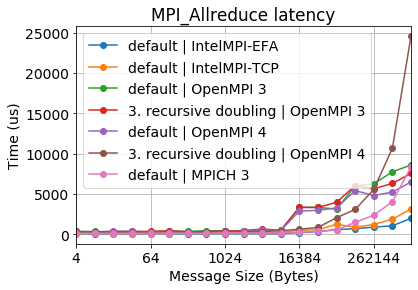

In [13]:
df_important = df_allreduce.filter(regex=r'(default|recursive doubling)')
df_important.index.name='message size (Bytes)'

plot_osu(df_important)
plt.ylabel('Time (us)')
plt.title('MPI_Allreduce latency')
plt.savefig('allreduce_important_algo.png', dpi=144, bbox_inches='tight')